# Crime Data Exploratory Data Analysis - Los Angeles

> Setup

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [27]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

> Data loading

In [28]:
df_crimes = pd.read_csv(
    '../data/raw/crimes.csv',
    parse_dates=['Date Rptd', 'DATE OCC'],
    dtype={'TIME OCC': str},
    low_memory=False
)

Initial Dataset Overview

In [19]:
df_crimes.info()
df_crimes.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185715 entries, 0 to 185714
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   DR_NO         185715 non-null  int64         
 1   Date Rptd     185715 non-null  datetime64[ns]
 2   DATE OCC      185715 non-null  datetime64[ns]
 3   TIME OCC      185715 non-null  object        
 4   AREA NAME     185715 non-null  object        
 5   Crm Cd Desc   185715 non-null  object        
 6   Vict Age      185715 non-null  int64         
 7   Vict Sex      185704 non-null  object        
 8   Vict Descent  185705 non-null  object        
 9   Weapon Desc   73502 non-null   object        
 10  Status Desc   185715 non-null  object        
 11  LOCATION      185715 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 17.0+ MB


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


Data Cleaning and Preprocessing

>standardize time format and extract hour

In [20]:
df_crimes['HOUR'] = df_crimes['TIME OCC'].str.zfill(4).str[:2].astype(int)

> Handle missing values

In [21]:
missing_data = df_crimes.isnull().sum()
missing_data

DR_NO                0
Date Rptd            0
DATE OCC             0
TIME OCC             0
AREA NAME            0
Crm Cd Desc          0
Vict Age             0
Vict Sex            11
Vict Descent        10
Weapon Desc     112213
Status Desc          0
LOCATION             0
HOUR                 0
dtype: int64

In [22]:
df_crimes['Vict Sex'] = df_crimes['Vict Sex'].fillna('Unknown')
df_crimes['Vict Descent'] = df_crimes['Vict Descent'].fillna('Unknown')
df_crimes['Weapon Desc'] = df_crimes['Weapon Desc'].fillna('No Weapon/Unknown')

> Extract additional time features

In [23]:
df_crimes['Month'] = df_crimes['DATE OCC'].dt.month
df_crimes['Year'] = df_crimes['DATE OCC'].dt.year
df_crimes['Day'] = df_crimes['DATE OCC'].dt.day
df_crimes['DayOfWeek'] = df_crimes['DATE OCC'].dt.day_name()

> Calculate time to report (days between occurrence and reporting)


In [24]:
df_crimes['TimeToReport'] = (df_crimes['Date Rptd'] - df_crimes['DATE OCC']).dt.days

In [25]:
# 4. Basic Dataset Information
def print_dataset_info(df):
    print("Dataset Overview:")
    print("-" * 50)
    print(f"Number of Records: {len(df):,}")
    print(f"Time Period: {df['DATE OCC'].min().year} to {df['DATE OCC'].max().year}")
    print(f"Number of Unique Crime Types: {df['Crm Cd Desc'].nunique()}")
    print(f"Number of Areas: {df['AREA NAME'].nunique()}")
    print("\nMissing Values:")
    print(df.isnull().sum())

print_dataset_info(df_crimes)


Dataset Overview:
--------------------------------------------------
Number of Records: 185,715
Time Period: 2020 to 2023
Number of Unique Crime Types: 104
Number of Areas: 21

Missing Values:
DR_NO           0
Date Rptd       0
DATE OCC        0
TIME OCC        0
AREA NAME       0
Crm Cd Desc     0
Vict Age        0
Vict Sex        0
Vict Descent    0
Weapon Desc     0
Status Desc     0
LOCATION        0
HOUR            0
Month           0
Year            0
Day             0
DayOfWeek       0
TimeToReport    0
dtype: int64


# Visualization

> Crime distribution by Area

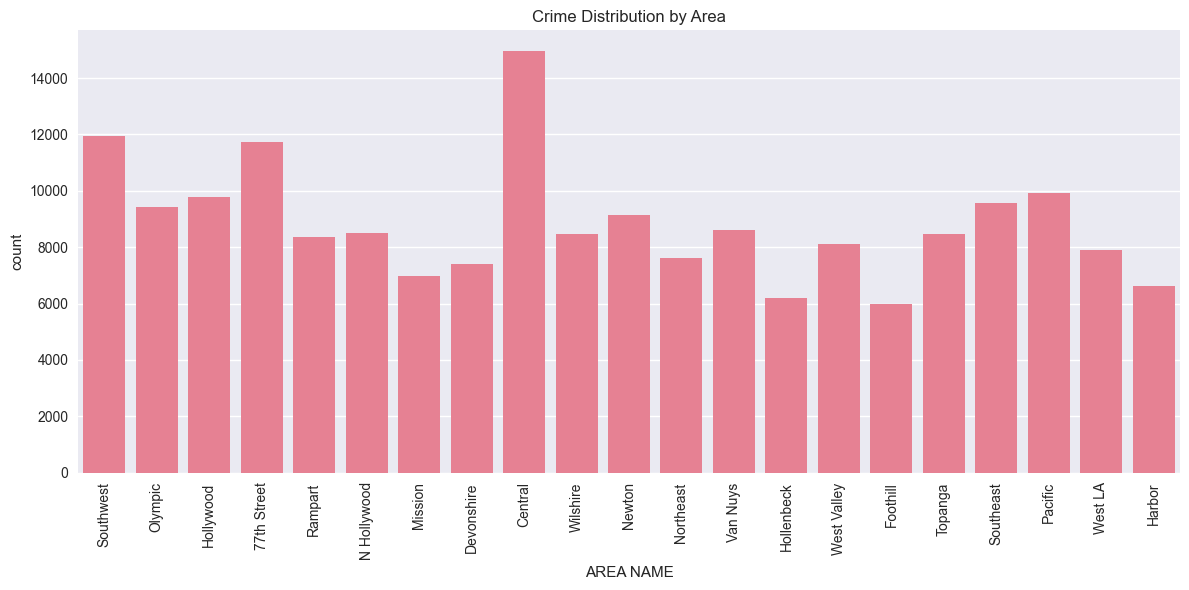

In [29]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_crimes, x='AREA NAME')
plt.xticks(rotation=90)
plt.title('Crime Distribution by Area')
plt.tight_layout()
plt.show()

> Top 10 Crime Types

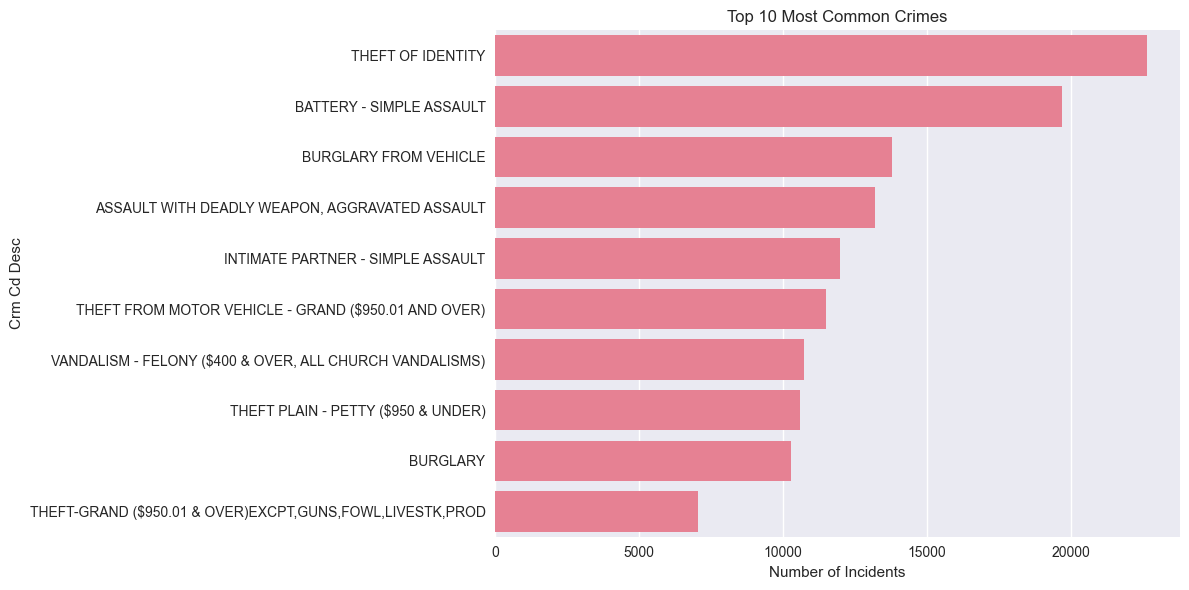

In [30]:
plt.figure(figsize=(12, 6))
top_crimes = df_crimes['Crm Cd Desc'].value_counts().head(10)
sns.barplot(x=top_crimes.values, y=top_crimes.index)
plt.title('Top 10 Most Common Crimes')
plt.xlabel('Number of Incidents')
plt.tight_layout()
plt.show()

> Victim Age Distribution

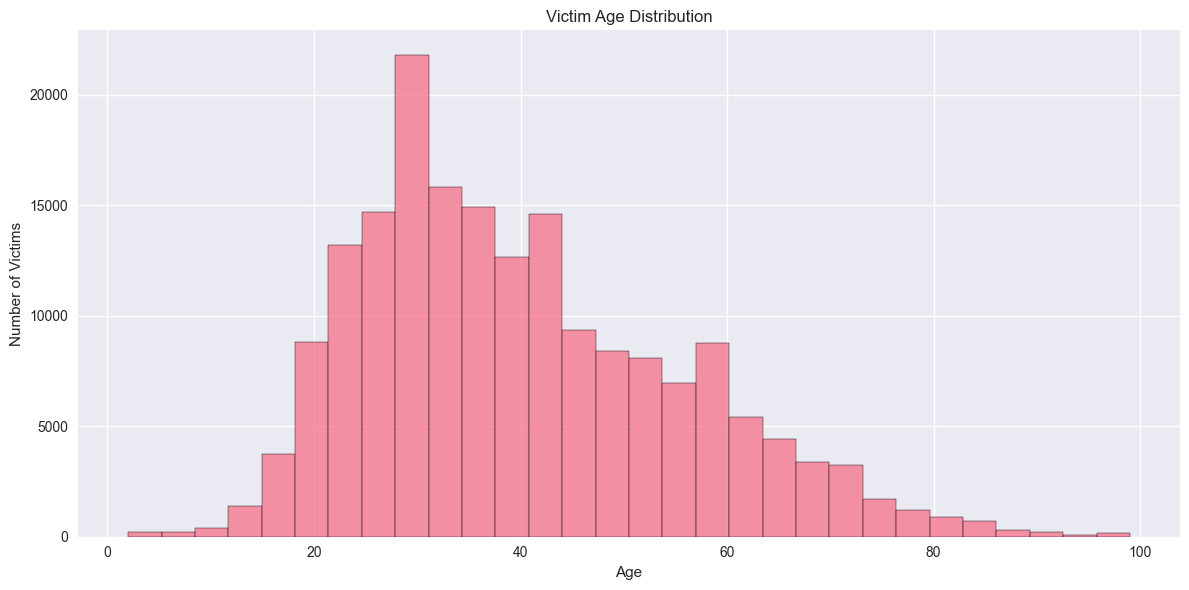

In [32]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df_crimes, x='Vict Age', bins=30)
plt.title('Victim Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Victims')
plt.tight_layout()
plt.show()